Non-negative Basis Pursuit DeNoising (ADMM)
===========================================

This example demonstrates the use of class
[admm.ADMM](../_autosummary/scico.admm.rst#scico.admm.ADMM) to solve
the non-negative sparse coding problem problem

  $$\mathrm{argmin}_{\mathbf{x}} \; \| \mathbf{y} - D \mathbf{x} \|_2^2
  + \lambda \| \mathbf{x} \|_1 + I(\mathbf{x} \geq 0)\;,$$

where $D$ the dictionary, $\mathbf{y}$ the signal to be represented,
$\mathbf{x}$ is the sparse representation, and $I(\mathbf{x} \geq 0)$
is the non-negative indicator.

In [1]:
import numpy as np

import jax

from scico import functional, linop, loss, plot
from scico.admm import ADMM, LinearSubproblemSolver
from scico.util import device_info
plot.config_notebook_plotting()

Create random dictionary, reference random sparse representation, and
test signal consisting of the synthesis of the reference sparse
representation.

In [2]:
m = 32  # signal size
n = 128  # dictionary size
s = 10  # sparsity level

np.random.seed(1)
D = np.random.randn(m, n)
D = D / np.linalg.norm(D, axis=0, keepdims=True)  # normalize dictionary

xt = np.zeros(n)  # true signal
idx = np.random.randint(low=0, high=n, size=s)  # support of xt
xt[idx] = np.random.rand(s)
y = D @ xt + 5e-2 * np.random.randn(m)  # synthetic signal

xt = jax.device_put(xt)  # convert to jax array, push to GPU
y = jax.device_put(y)  # convert to jax array, push to GPU

Set up the forward operator and ADMM solver object.

In [3]:
lmbda = 1e-1
A = linop.MatrixOperator(D)
f = loss.SquaredL2Loss(y=y, A=A)
g_list = [lmbda * functional.L1Norm(), functional.NonNegativeIndicator()]
C_list = [linop.Identity((n)), linop.Identity((n))]
rho_list = [1.0, 1.0]
maxiter = 100  # number of ADMM iterations

solver = ADMM(
    f=f,
    g_list=g_list,
    C_list=C_list,
    rho_list=rho_list,
    x0=A.adj(y),
    maxiter=maxiter,
    subproblem_solver=LinearSubproblemSolver(),
    verbose=True,
)

Run the solver.

In [4]:
print(f"Solving on {device_info()}\n")
x = solver.solve()

Solving on GPU (NVIDIA GeForce RTX 2080 Ti)



Iter  Time      Objective  Primal Rsdl  Dual Rsdl
-------------------------------------------------
   0  2.17e+00  2.810e+00    1.435e+00  4.750e+00
   1  3.42e+00  6.810e-01    4.430e-01  8.297e-01
   2  3.47e+00  6.931e-01    3.791e-01  2.579e-01
   3  3.52e+00  6.060e-01    2.025e-01  1.891e-01
   4  3.56e+00  5.527e-01    1.014e-01  1.657e-01


   5  3.62e+00  5.219e-01    7.435e-02  1.383e-01
   6  3.66e+00  5.079e-01    7.708e-02  1.088e-01
   7  3.71e+00  4.989e-01    5.200e-02  9.590e-02
   8  3.76e+00  4.928e-01    4.370e-02  8.704e-02
   9  3.81e+00  4.904e-01    5.080e-02  7.129e-02


  10  3.85e+00  4.879e-01    3.589e-02  6.160e-02
  11  3.90e+00  4.858e-01    3.085e-02  5.369e-02
  12  3.95e+00  4.847e-01    3.254e-02  4.529e-02
  13  3.99e+00  4.829e-01    2.271e-02  3.870e-02
  14  4.03e+00  4.811e-01    1.596e-02  3.524e-02


  15  4.07e+00  4.797e-01    1.319e-02  3.197e-02
  16  4.11e+00  4.785e-01    1.167e-02  2.921e-02
  17  4.15e+00  4.775e-01    1.091e-02  2.673e-02
  18  4.18e+00  4.765e-01    1.011e-02  2.467e-02
  19  4.22e+00  4.757e-01    9.884e-03  2.269e-02
  20  4.25e+00  4.753e-01    1.018e-02  2.036e-02


  21  4.28e+00  4.750e-01    9.116e-03  1.848e-02
  22  4.31e+00  4.749e-01    8.490e-03  1.640e-02
  23  4.35e+00  4.749e-01    8.105e-03  1.462e-02
  24  4.38e+00  4.748e-01    6.656e-03  1.307e-02
  25  4.40e+00  4.746e-01    5.801e-03  1.176e-02
  26  4.43e+00  4.744e-01    5.057e-03  1.065e-02
  27  4.47e+00  4.742e-01    4.407e-03  9.717e-03


  28  4.50e+00  4.740e-01    3.852e-03  8.930e-03
  29  4.54e+00  4.739e-01    3.385e-03  8.260e-03
  30  4.56e+00  4.737e-01    2.998e-03  7.681e-03
  31  4.59e+00  4.736e-01    2.681e-03  7.170e-03
  32  4.62e+00  4.735e-01    2.423e-03  6.714e-03
  33  4.65e+00  4.734e-01    2.210e-03  6.299e-03
  34  4.69e+00  4.733e-01    2.034e-03  5.919e-03


  35  4.72e+00  4.733e-01    1.883e-03  5.567e-03
  36  4.75e+00  4.732e-01    1.753e-03  5.240e-03
  37  4.78e+00  4.732e-01    1.637e-03  4.933e-03
  38  4.80e+00  4.731e-01    1.533e-03  4.646e-03
  39  4.83e+00  4.731e-01    1.438e-03  4.377e-03
  40  4.86e+00  4.732e-01    1.711e-03  3.709e-03
  41  4.89e+00  4.732e-01    1.777e-03  3.219e-03


  42  4.92e+00  4.732e-01    1.506e-03  2.784e-03
  43  4.95e+00  4.732e-01    1.417e-03  2.403e-03
  44  4.98e+00  4.732e-01    1.297e-03  2.078e-03
  45  5.01e+00  4.732e-01    1.166e-03  1.802e-03
  46  5.04e+00  4.731e-01    1.036e-03  1.566e-03
  47  5.06e+00  4.731e-01    9.219e-04  1.341e-03
  48  5.09e+00  4.731e-01    8.266e-04  1.141e-03
  49  5.12e+00  4.731e-01    7.104e-04  9.697e-04


  50  5.14e+00  4.731e-01    6.210e-04  8.221e-04
  51  5.17e+00  4.731e-01    5.394e-04  6.972e-04
  52  5.20e+00  4.730e-01    4.663e-04  5.905e-04
  53  5.23e+00  4.730e-01    4.012e-04  4.993e-04
  54  5.26e+00  4.730e-01    3.439e-04  4.220e-04
  55  5.28e+00  4.730e-01    2.936e-04  3.561e-04
  56  5.31e+00  4.730e-01    2.498e-04  3.006e-04


  57  5.35e+00  4.730e-01    2.099e-04  2.507e-04
  58  5.38e+00  4.730e-01    1.780e-04  2.144e-04
  59  5.41e+00  4.730e-01    1.506e-04  1.818e-04
  60  5.43e+00  4.730e-01    1.274e-04  1.549e-04
  61  5.47e+00  4.730e-01    1.080e-04  1.322e-04
  62  5.49e+00  4.730e-01    9.142e-05  1.131e-04
  63  5.52e+00  4.730e-01    7.722e-05  9.760e-05
  64  5.54e+00  4.730e-01    6.169e-05  7.752e-05


  65  5.57e+00  4.730e-01    5.078e-05  7.121e-05
  66  5.59e+00  4.730e-01    4.403e-05  6.321e-05
  67  5.61e+00  4.730e-01    3.877e-05  5.688e-05
  68  5.64e+00  4.730e-01    3.307e-05  5.035e-05
  69  5.66e+00  4.730e-01    2.901e-05  4.580e-05
  70  5.69e+00  4.730e-01    2.507e-05  4.112e-05
  71  5.71e+00  4.730e-01    1.710e-05  2.172e-05
  72  5.73e+00  4.730e-01    2.128e-05  1.658e-05
  73  5.76e+00  4.730e-01    1.280e-05  1.101e-05


  74  5.79e+00  4.730e-01    1.280e-05  0.000e+00
  75  5.81e+00  4.730e-01    9.261e-06  1.535e-05
  76  5.84e+00  4.730e-01    6.906e-06  1.154e-05
  77  5.86e+00  4.730e-01    6.906e-06  0.000e+00
  78  5.88e+00  4.730e-01    8.234e-06  1.153e-05
  79  5.91e+00  4.730e-01    4.058e-06  1.016e-05
  80  5.93e+00  4.730e-01    4.058e-06  0.000e+00
  81  5.96e+00  4.730e-01    4.058e-06  0.000e+00
  82  5.98e+00  4.730e-01    4.058e-06  0.000e+00


  83  6.01e+00  4.730e-01    4.058e-06  0.000e+00
  84  6.03e+00  4.730e-01    7.535e-06  9.742e-06
  85  6.06e+00  4.730e-01    7.535e-06  0.000e+00
  86  6.09e+00  4.730e-01    1.874e-06  8.316e-06
  87  6.11e+00  4.730e-01    1.874e-06  0.000e+00
  88  6.13e+00  4.730e-01    1.874e-06  0.000e+00
  89  6.16e+00  4.730e-01    1.874e-06  0.000e+00
  90  6.19e+00  4.730e-01    1.874e-06  0.000e+00


  91  6.22e+00  4.730e-01    1.874e-06  0.000e+00
  92  6.25e+00  4.730e-01    1.874e-06  0.000e+00
  93  6.27e+00  4.730e-01    1.874e-06  0.000e+00
  94  6.29e+00  4.730e-01    1.874e-06  0.000e+00
  95  6.31e+00  4.730e-01    7.745e-06  8.150e-06
  96  6.33e+00  4.730e-01    7.745e-06  0.000e+00
  97  6.35e+00  4.730e-01    1.829e-06  7.832e-06
  98  6.37e+00  4.730e-01    1.829e-06  0.000e+00
  99  6.39e+00  4.730e-01    1.829e-06  0.000e+00


Plot the recovered coefficients and signal.

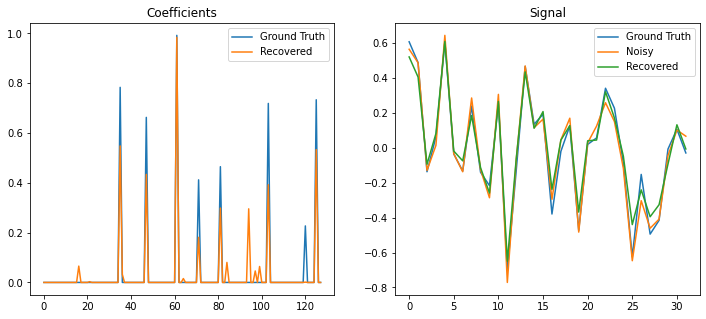

In [5]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 5))
plot.plot(
    np.vstack((xt, solver.x)).T,
    title="Coefficients",
    lgnd=("Ground Truth", "Recovered"),
    fig=fig,
    ax=ax[0],
)
plot.plot(
    np.vstack((D @ xt, y, D @ solver.x)).T,
    title="Signal",
    lgnd=("Ground Truth", "Noisy", "Recovered"),
    fig=fig,
    ax=ax[1],
)
fig.show()